### Import

In [20]:
import pandas as pd
import numpy as np
import os
import random

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso

## Fixed Random-Seed
동일한 결과를 위한 seed 고정

In [5]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

## Load Data
train.csv, test.csv 파일을 불러오자.

In [6]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [9]:
train.sample(10)

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
76123,SESSION_076123,USER_063426,1.0,Safari,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Singapore,Partners,affiliate,NaN,NaN
24428,SESSION_024428,USER_001715,16.0,Chrome,Chrome OS,desktop,0,69.0,1433.0,0,0.0,0.0,Americas,Northern America,United States,google,cpc,Category2_Keyword_023,NaN
71196,SESSION_071196,USER_059144,2.0,Chrome,Windows,desktop,0,1.0,13.0,0,0.0,0.0,Asia,Eastern Asia,China,analytics.google.com,referral,NaN,Category3_Path_0013
162381,SESSION_162381,USER_133726,1.0,Internet Explorer,Windows,desktop,1,1.0,0.0,1,0.0,0.0,Europe,Western Europe,Switzerland,youtube.com,referral,NaN,Category11_Path_0092
151384,SESSION_151384,USER_125071,2.0,Opera Mini,Samsung,mobile,1,1.0,103.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category8_Path_0204
55244,SESSION_055244,USER_046063,1.0,Edge,Windows,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,youtube.com,referral,NaN,Category13_Path_0176
223309,SESSION_223309,USER_183371,6.0,Chrome,Chrome OS,desktop,1,1.0,215.0,0,0.0,0.0,Europe,Southern Europe,Portugal,google,organic,Category8,NaN
70044,SESSION_070044,USER_058123,1.0,Safari,iOS,mobile,1,1.0,0.0,1,0.0,0.0,Europe,Northern Europe,United Kingdom,google,organic,Category8,NaN
244156,SESSION_244156,USER_199933,4.0,Chrome,Macintosh,desktop,1,1.0,48.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
52988,SESSION_052988,USER_044231,6.0,Chrome,Macintosh,desktop,1,1.0,54.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

### Target의 분포가 궁금하다.(단련뱡 분석)

In [31]:
train.sort_values(['TARGET'], ascending=False)

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
10966,SESSION_010966,USER_007922,386.0,Firefox,Windows,desktop,0,65.0,6470.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
201630,SESSION_201630,USER_149642,283.0,Chrome,Windows,desktop,0,20.0,6723.0,0,0.0,0.0,Europe,Western Europe,France,google,organic,Category8,NaN
13498,SESSION_013498,USER_011820,270.0,Android Webview,Android,mobile,1,7.0,360.0,0,0.0,0.0,Americas,South America,Brazil,(direct),(none),NaN,NaN
183839,SESSION_183839,USER_151779,224.0,Chrome,Windows,desktop,1,11.0,10346.0,0,0.0,0.0,Asia,Southeast Asia,Philippines,google,organic,Category8,NaN
232266,SESSION_232266,USER_190551,199.0,Safari,Macintosh,desktop,1,83.0,1069.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88027,SESSION_088027,USER_073336,1.0,Opera Mini,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southern Asia,India,(direct),(none),NaN,NaN
88028,SESSION_088028,USER_073337,1.0,Chrome,Windows,desktop,1,1.0,0.0,1,0.0,0.0,Europe,Northern Europe,United Kingdom,google,organic,Category8,NaN
88030,SESSION_088030,USER_073339,1.0,Safari,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Vietnam,youtube.com,referral,NaN,Category13_Path_0007
162922,SESSION_162922,USER_134152,1.0,UC Browser,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Western Asia,United Arab Emirates,youtube.com,referral,NaN,Category8_Path_0225


In [34]:
train[train['TARGET']>100].sort_values(['TARGET'], ascending=False)

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
10966,SESSION_010966,USER_007922,386.0,Firefox,Windows,desktop,0,65.0,6470.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
201630,SESSION_201630,USER_149642,283.0,Chrome,Windows,desktop,0,20.0,6723.0,0,0.0,0.0,Europe,Western Europe,France,google,organic,Category8,NaN
13498,SESSION_013498,USER_011820,270.0,Android Webview,Android,mobile,1,7.0,360.0,0,0.0,0.0,Americas,South America,Brazil,(direct),(none),NaN,NaN
183839,SESSION_183839,USER_151779,224.0,Chrome,Windows,desktop,1,11.0,10346.0,0,0.0,0.0,Asia,Southeast Asia,Philippines,google,organic,Category8,NaN
232266,SESSION_232266,USER_190551,199.0,Safari,Macintosh,desktop,1,83.0,1069.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
199559,SESSION_199559,USER_164595,198.0,Firefox,Windows,desktop,1,5.0,1374.0,0,0.0,0.0,Europe,Eastern Europe,Romania,youtube.com,referral,NaN,Category2_Path_0018
231169,SESSION_231169,USER_189663,176.0,Safari,Macintosh,desktop,1,83.0,974.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
23793,SESSION_023793,USER_020520,171.0,Chrome,Windows,desktop,1,18.0,6470.0,0,2.0,126439360.0,Americas,South America,Venezuela,google,organic,Category8,NaN
100318,SESSION_100318,USER_039312,161.0,Chrome,Macintosh,desktop,0,87.0,4148.0,0,12.0,649821280.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
60549,SESSION_060549,USER_050216,157.0,Chrome,Windows,desktop,1,16.0,4194.0,0,2.0,442613280.0,Americas,South America,Venezuela,google,organic,Category8,NaN


In [37]:
# target이 100 이상인 데이터의 수는?
len(train[train['TARGET'] >= 100])

23

In [38]:
len(train[(train['TARGET']>50) & (train['TARGET']<100)])

293

In [ ]:
len()

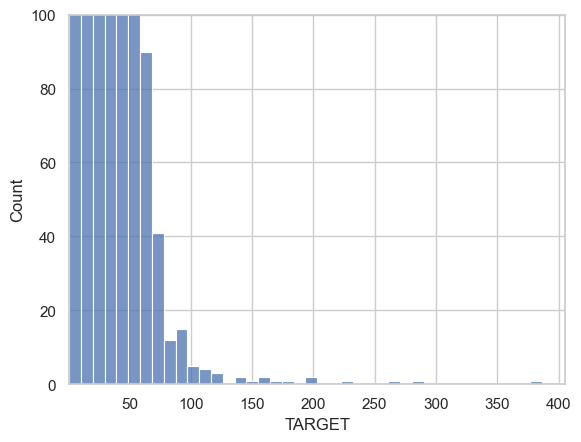

In [41]:
sns.histplot(x=train['TARGET'], bins=40)
sns.set_theme(style='whitegrid')
plt.xlim(1)
plt.show()

## 아래는 잘 못된 코드. 

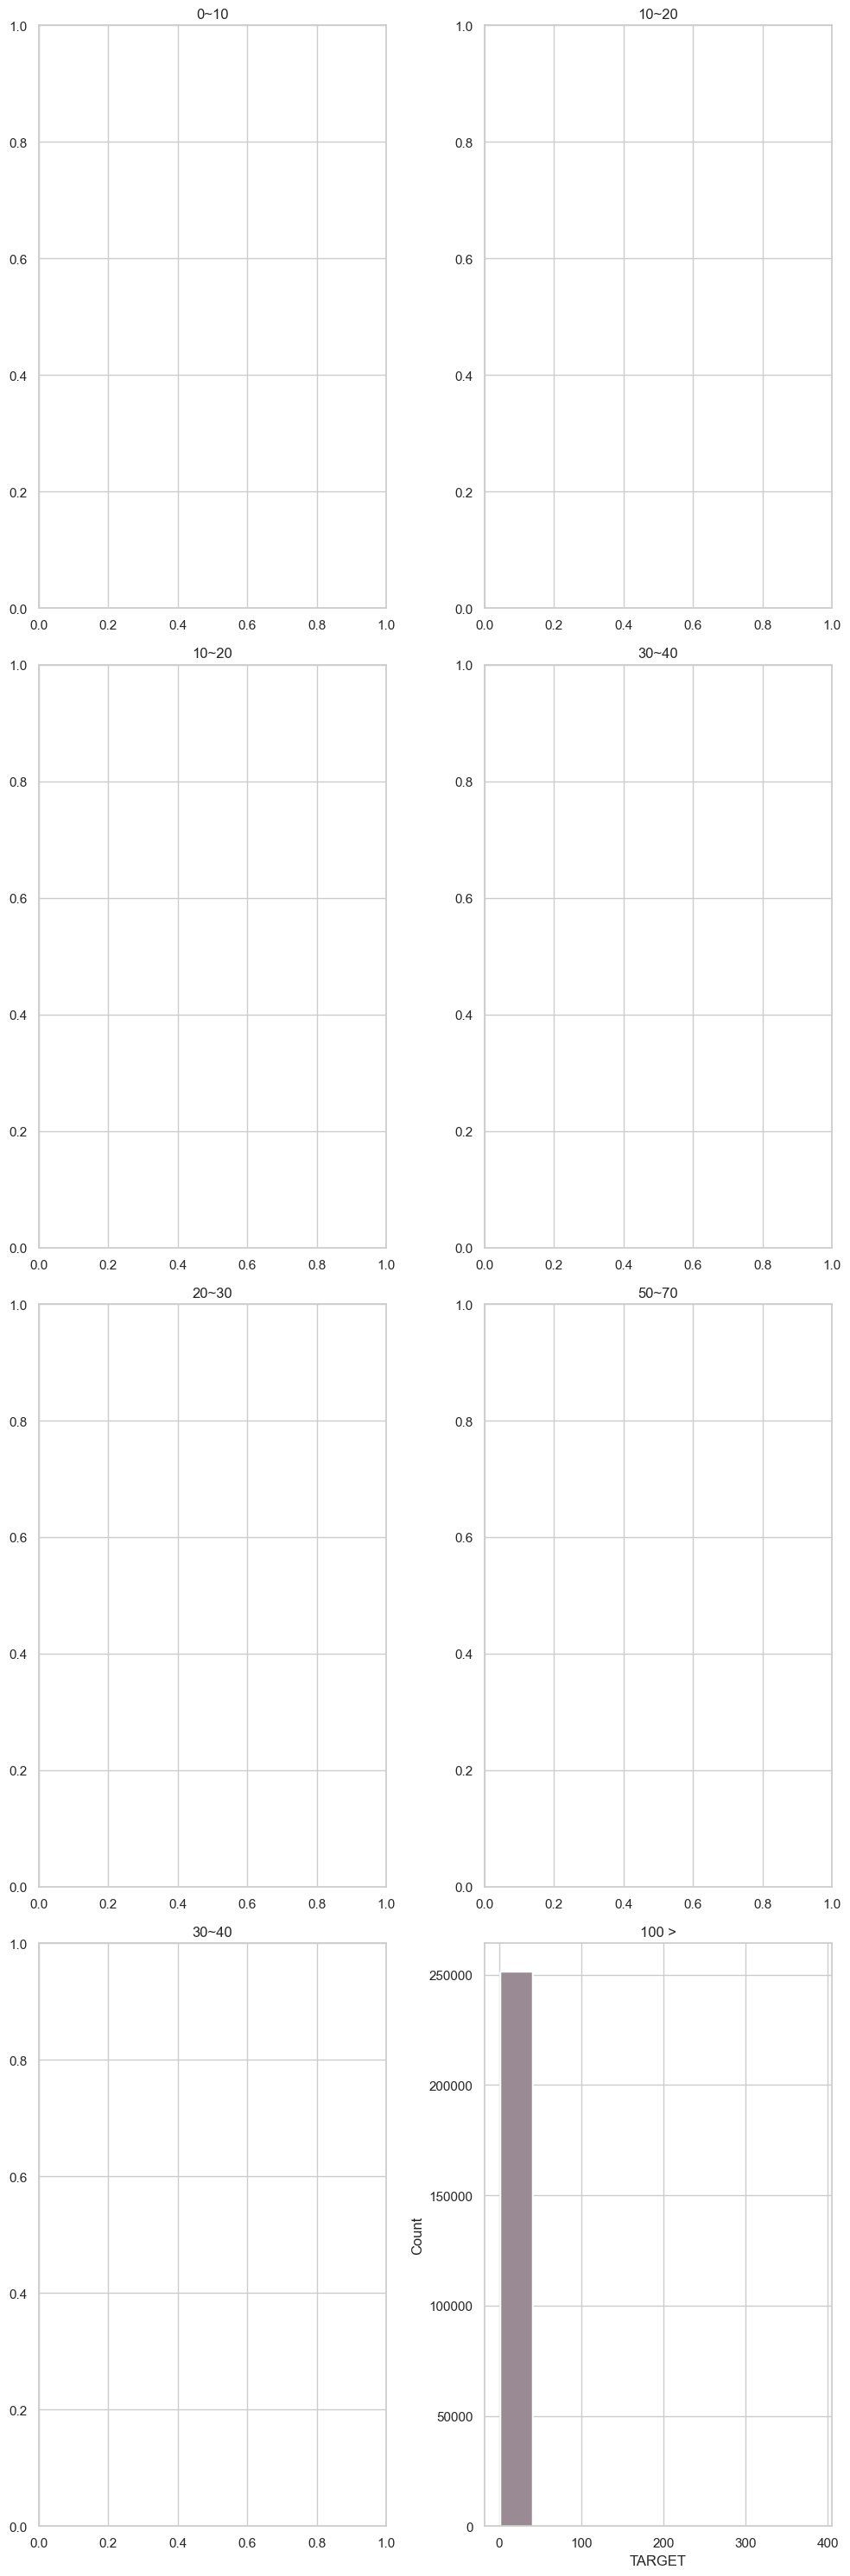

In [65]:
# 구간별 histogram 
# 100 이상
# 70~100, 50~70
# 0~10, 10~20, 20~30, 30~40, 40~50
fig, ax = plt.subplots(4,2)
fig.set_size_inches((10, 30))
title_list = ['0~10', '10~20', '20~30', '30~40', '40~50', '50~70', '70~100', '100 >']
for i in range(4):
    for j in range(2):
        cur_ax = ax[i, j]
        sns.histplot(x=train['TARGET'], bins=10)
        plt.xlim()
        plt.ylim()
        cur_ax.set_title(title_list[(i+1)*(j+1)-1])

plt.tight_layout()
plt.show()

In [78]:
target_count = train['TARGET'].value_counts()
target_count.sort_index(ascending=True, inplace=True)

c:\Users\kyeul\Desktop\code\dacon\Hackerthon-predict_on_web_log\.conda\Lib\site-packages\seaborn\distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


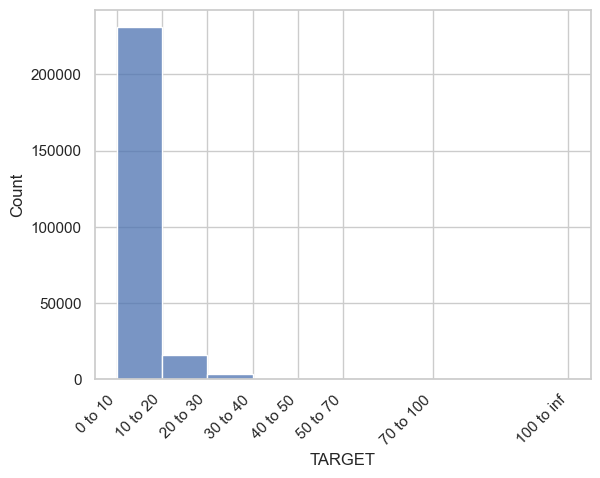

In [69]:


# 히스토그램 그릴 구간 정의
bins = [0, 10, 20, 30, 40, 50, 70, 100, np.inf]

# 서브플롯 생성
fig, ax = plt.subplots()

# 히스토그램 그리기
sns.histplot(data=train['TARGET'], bins=bins, kde=False, stat='count', ax=ax)

# x축 구간 설정
ax.set_xticks(bins[:-1])
ax.set_xticklabels([f'{bins[i]} to {bins[i+1]}' for i in range(len(bins)-1)], rotation=45, ha='right')

# 그래프 출력
plt.show()

C:\Users\kyeul\AppData\Local\Temp\ipykernel_28252\2041765128.py:35: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(left=100)


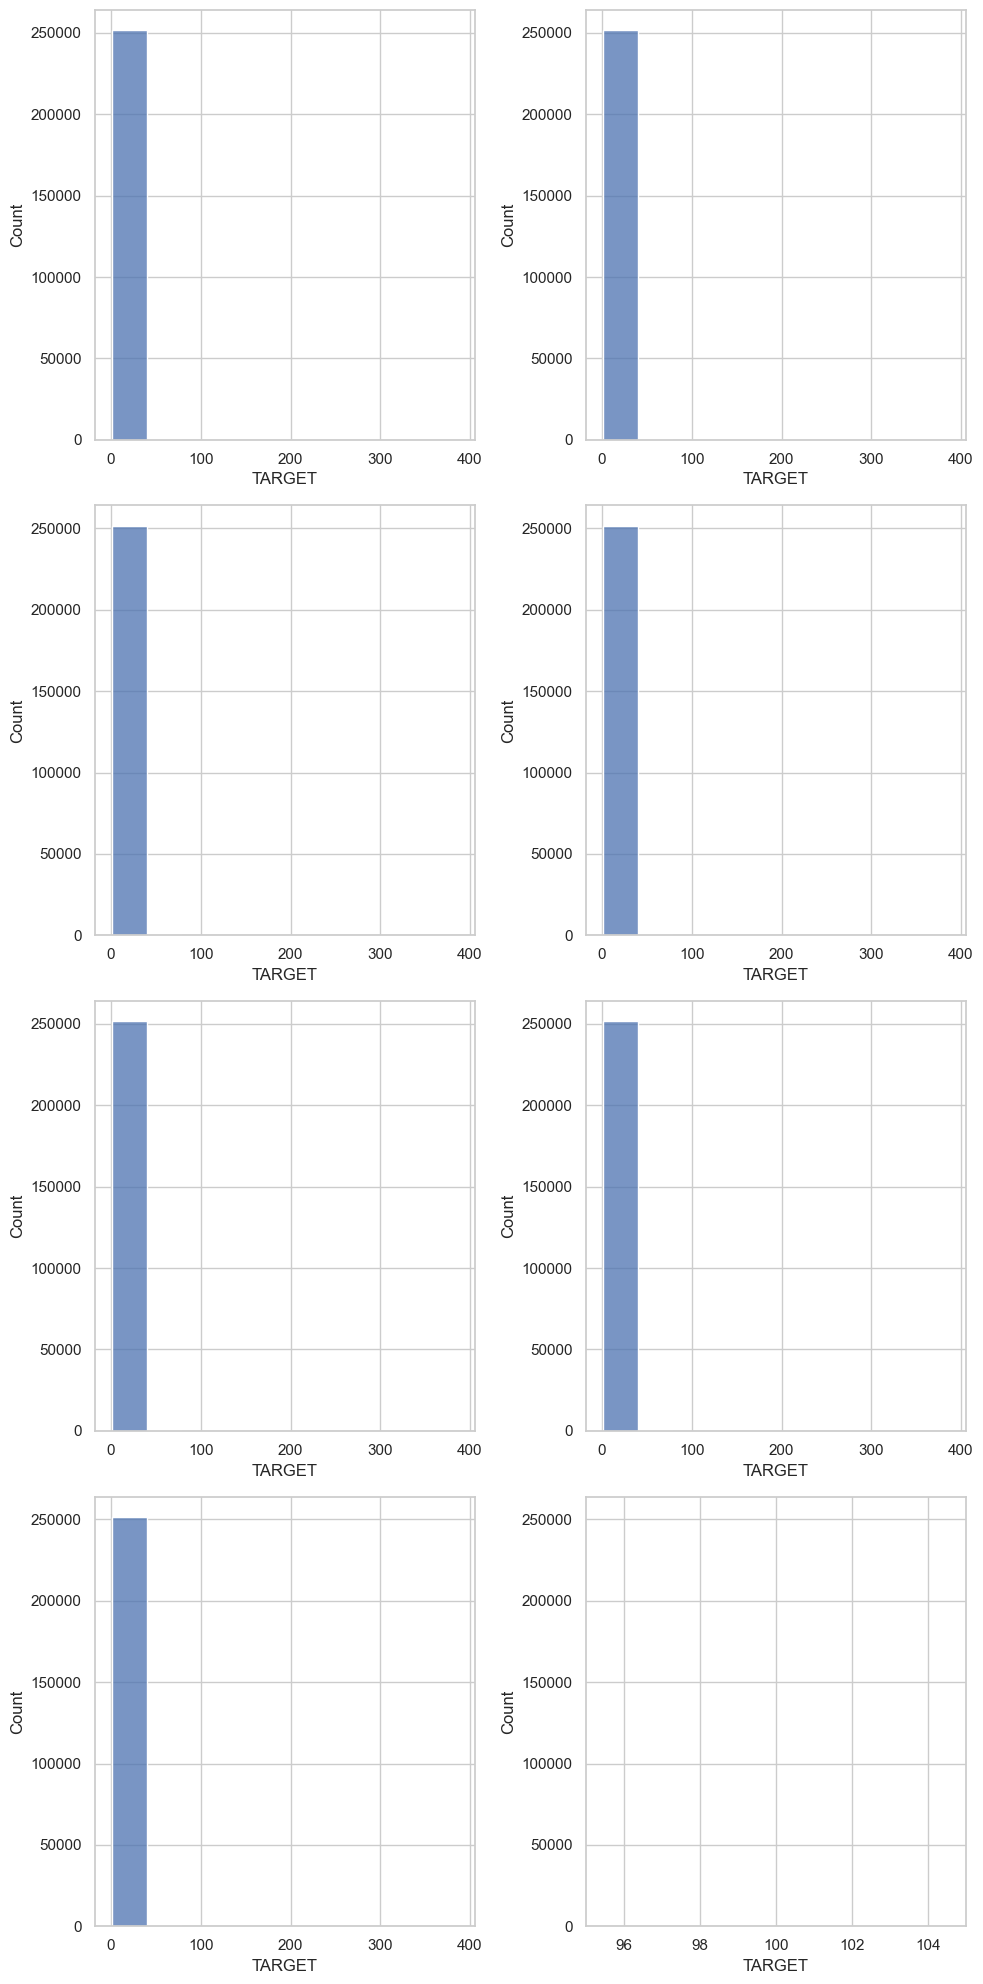

In [67]:
fig, ax = plt.subplots(4,2)
fig.set_size_inches((10, 20))

# 0 ~ 10
cur_ax = ax[0, 0]
sns.histplot(x=train['TARGET'], bins=10, ax = cur_ax)
plt.xlim(0, 10)
# 10 ~ 20
cur_ax = ax[0, 1]
sns.histplot(x=train['TARGET'], bins=10, ax = cur_ax)
plt.xlim(10, 20)
# 20 ~ 30
cur_ax = ax[1, 0]
sns.histplot(x=train['TARGET'], bins=10, ax = cur_ax)
plt.xlim(20, 30)
# 30 ~ 40
cur_ax = ax[1, 1]
sns.histplot(x=train['TARGET'], bins=10, ax = cur_ax)
plt.xlim(30, 40)
# 40 ~ 50
cur_ax = ax[2, 0]
sns.histplot(x=train['TARGET'], bins=10, ax = cur_ax)
plt.xlim(40, 50)
# 50 ~ 70
cur_ax = ax[2, 1]
sns.histplot(x=train['TARGET'], bins=10, ax = cur_ax)
plt.xlim(50, 70)
# 70 ~ 100
cur_ax = ax[3, 0]
sns.histplot(x=train['TARGET'], bins=10, ax = cur_ax)
plt.xlim(70, 100)
# 100 >
cur_ax = ax[3, 1]
sns.histplot(x=train['TARGET'], bins=10, ax = cur_ax)
plt.xlim(left=100)


# cur_ax.set_title(title_list[(i+1)*(j+1)-1])
plt.tight_layout()
plt.show()


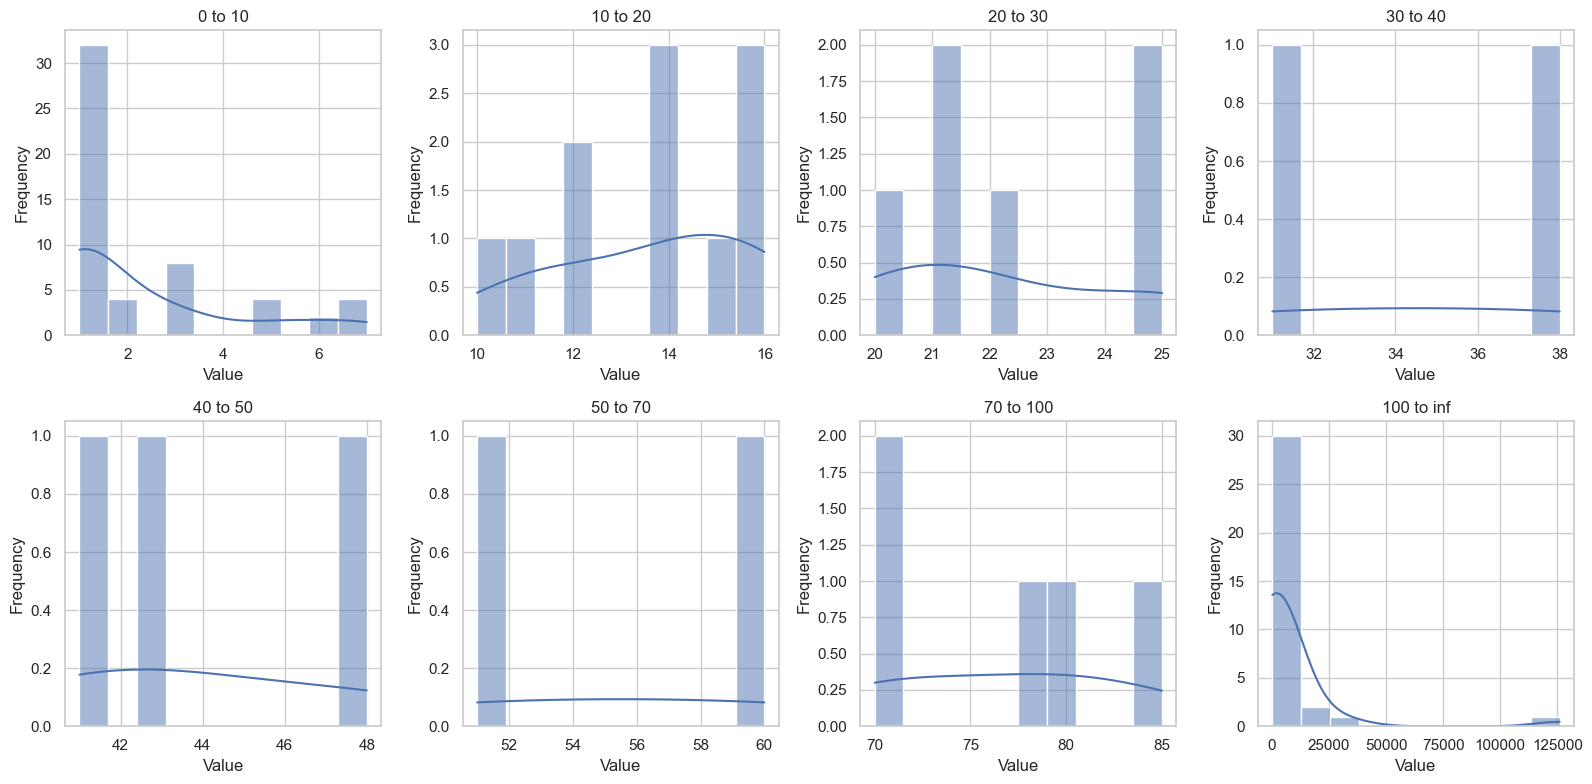

In [79]:
bins = [0, 10, 20, 30, 40, 50, 70, 100, np.inf]

# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# 각 구간에 대한 히스토그램 그리기
for ax, bin_start, bin_end in zip(axes.flatten(), bins[:-1], bins[1:]):
    sns.histplot(target_count[(target_count >= bin_start) & (target_count < bin_end)], ax=ax, bins=10, kde=True)
    ax.set_title(f'{bin_start} to {bin_end}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()
plt.show()

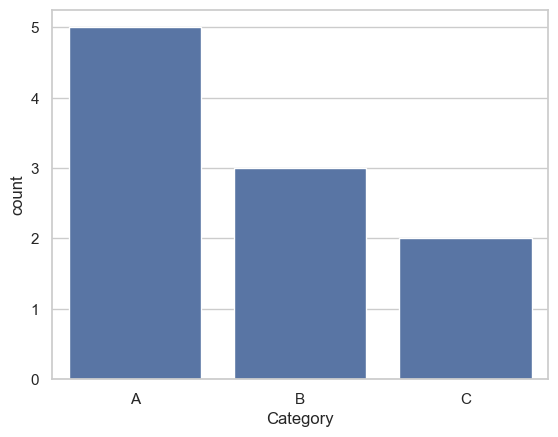

In [81]:
# 예시 데이터 생성
data = {
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'A', 'B', 'C', 'A']
}
df = pd.DataFrame(data)

# 값의 빈도 계산
value_counts = df['Category'].value_counts()

# 인덱스를 x값으로 사용하여 시각화
sns.barplot(x=value_counts.index, y=value_counts)

# 그래프 출력
plt.show()

#### -> note

### 방문을 자주 한 user의 target값은?

In [14]:
train['userID'].value_counts()

userID
USER_002675    78
USER_000643    74
USER_002967    61
USER_002775    59
USER_006147    50
               ..
USER_074258     1
USER_074259     1
USER_074260     1
USER_074261     1
USER_206023     1
Name: count, Length: 206024, dtype: int64

In [19]:
train[train['userID'] =='USER_002675']

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
2926,SESSION_002926,USER_002675,2.0,Chrome,Chrome OS,desktop,0,2.0,15.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
3081,SESSION_003081,USER_002675,1.0,Chrome,Chrome OS,desktop,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
3279,SESSION_003279,USER_002675,1.0,Chrome,Chrome OS,desktop,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
3434,SESSION_003434,USER_002675,2.0,Chrome,Chrome OS,desktop,0,2.0,14.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
3840,SESSION_003840,USER_002675,5.0,Chrome,Chrome OS,desktop,0,6.0,299.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157724,SESSION_157724,USER_002675,3.0,Chrome,Chrome OS,desktop,0,2.0,17.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
158184,SESSION_158184,USER_002675,1.0,Chrome,Chrome OS,desktop,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
158966,SESSION_158966,USER_002675,3.0,Chrome,Chrome OS,desktop,0,5.0,537.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN
160941,SESSION_160941,USER_002675,2.0,Chrome,Chrome OS,desktop,0,2.0,5.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,NaN


In [11]:
train.describe()

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue
count,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,2.522890e+05
mean,3.592626,0.751955,3.816805,113.104253,0.493672,0.009033,9.061248e+05
std,5.509465,0.431879,11.091028,330.876019,0.499961,0.100938,2.127689e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,1.000000,1.000000,71.000000,1.000000,0.000000,0.000000e+00
max,386.000000,1.000000,98.000000,11186.000000,1.000000,12.000000,3.325712e+09


### 데이터 전처리1 : 결측값 대체
모델에게 입력할 학습데이터와 추론데이터에 대해 결측값을 대체해 봅시다. 단, 추론데이터 결측값 대체시에 추론데이터의 통계량을 활용할 경우 Data Leakage에 해당됩니다.

In [7]:
train_missing_values = train.isnull().sum()
print("Train 데이터셋의 결측값: ")
print(train_missing_values[train_missing_values > 0]) # 결측값이 있는 열만 출력

Train 데이터셋의 결측값: 
keyword          137675
referral_path    161107
dtype: int64
